In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from keras.optimizers import Adam


In [ ]:

# Load MNIST dataset
(X_train, _), (_, _) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = X_train.reshape(X_train.shape[0], 784)

# Define GAN parameters
random_dim = 20
adam = Adam(learning_rate=0.0002, beta_1=0.5)


In [ ]:
# Generator model
generator = Sequential()
generator.add(Dense(256, input_dim=random_dim))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(784, activation='tanh'))
generator.compile(loss='binary_crossentropy', optimizer=adam)

# Discriminator model
discriminator = Sequential()
discriminator.add(Dense(1024, input_dim=784))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=adam)

# Combined model (Generator + Discriminator)
discriminator.trainable = False
gan_input = Input(shape=(random_dim,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=adam)

In [ ]:
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 sequential (Sequential)     (None, 784)               1473040   
                                                                 
 sequential_1 (Sequential)   (None, 1)                 1460225   
                                                                 
Total params: 2,933,265
Trainable params: 1,469,456
Non-trainable params: 1,463,809
_________________________________________________________________


In [ ]:
# Function to train GAN
def train_gan(epochs=1, batch_size=128):
    batch_count = X_train.shape[0] // batch_size

    for e in range(epochs):
        for _ in range(batch_count):
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            generated_images = generator.predict(noise)
            image_batch = X_train[np.random.randint(0, X_train.shape[0], size=batch_size)]

            X = np.concatenate([image_batch, generated_images])
            y_dis = np.zeros(2 * batch_size)
            y_dis[:batch_size] = 0.9  # Label smoothing

            discriminator.trainable = True
            d_loss = discriminator.train_on_batch(X, y_dis)

            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            y_gen = np.ones(batch_size)
            discriminator.trainable = False
            g_loss = gan.train_on_batch(noise, y_gen)

        print(f"Epoch {e} - Discriminator Loss: {d_loss}, Generator Loss: {g_loss}")

In [ ]:
# Train GAN
train_gan(epochs=10, batch_size=128)

4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 6ms/step
Epoch 0 - Discriminator Loss: 0.4435781240463257, Generator Loss: 1.2778944969177246
4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 5ms/step
Epoch 1 - Discriminator Loss: 0.4541802406311035, Generator Loss: 1.1961822509765625
4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 6ms/step
Epoch 2 - Discriminator Loss: 0.4557805359363556, Generator Loss: 0.7612242698669434
4/4 [==============================] - 0s 8ms/step


4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 8ms/step
Epoch 3 - Discriminator Loss: 0.44853952527046204, Generator Loss: 1.6609617471694946
4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 7ms/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 6ms/step
Epoch 4 - Discriminator Loss: 0.5315473675727844, Generator Loss: 1.368995189666748
4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 6ms/step
Epoch 5 - Discriminator Loss: 0.5290988683700562, Generator Loss: 1.1679307222366333
4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 5ms/step
Epoch 6 - Discriminator Loss: 0.5350612998008728, Generator Loss: 1.1109464168548584
4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 6ms/step
Epoch 7 - Discriminator Loss: 0.5757169127464294, Generator Loss: 1.3556251525878906
4/4 [==============================] - 0s 7ms/step


4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 7ms/step


4/4 [==============================] - 0s 5ms/step
Epoch 8 - Discriminator Loss: 0.5591127872467041, Generator Loss: 1.5239025354385376
4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 6ms/step
Epoch 9 - Discriminator Loss: 0.5812238454818726, Generator Loss: 1.0520696640014648


In [ ]:
# Generate images using the trained generator
def generate_images(n):
    noise = np.random.normal(0, 1, size=[n, random_dim])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(n, 28, 28)

    plt.figure(figsize=(10, 10))
    for i in range(generated_images.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(generated_images[i], interpolation='nearest')
#         plt.axis('off')
    plt.show()



1/1 [==============================] - 0s 101ms/step


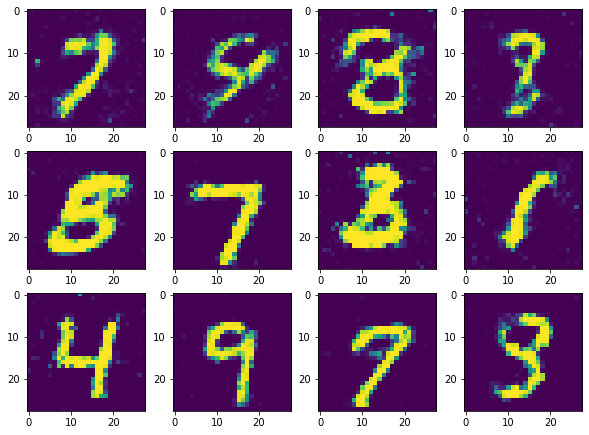

In [ ]:
# Generate and display images
generate_images(12)

In [ ]:
import numpy as np
from scipy.stats import entropy

# Function to calculate Number of statistically-Different Bins (NDB)
def calculate_ndb(data1, data2, num_bins=100):
    hist1, _ = np.histogram(data1, bins=num_bins, density=True)
    hist2, _ = np.histogram(data2, bins=num_bins, density=True)

    min_len = min(len(hist1), len(hist2))
    hist1 = hist1[:min_len]
    hist2 = hist2[:min_len]

    ndb = np.sqrt(0.5 * np.sum((np.sqrt(hist1) - np.sqrt(hist2))**2))
    return ndb

# Function to calculate Jensen-Shannon Divergence (JSD)
def calculate_jsd(data1, data2, num_bins=1000):
    hist1, _ = np.histogram(data1, bins=num_bins, density=True)
    hist2, _ = np.histogram(data2, bins=num_bins, density=True)

    min_len = min(len(hist1), len(hist2))
    hist1 = hist1[:min_len]
    hist2 = hist2[:min_len]

    # Normalize histograms
    hist1 /= np.sum(hist1)
    hist2 /= np.sum(hist2)

    # Calculate Jensen-Shannon Divergence
    avg_hist = 0.5 * (hist1 + hist2)
    jsd = 0.5 * (entropy(hist1, avg_hist) + entropy(hist2, avg_hist))
    return jsd


# Generate some images using the trained generator
def generate_images_for_evaluation(generator, num_samples=1000):
    noise = np.random.normal(0, 1, size=[num_samples, random_dim])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(num_samples, 28, 28)

    return generated_images

In [ ]:
# Evaluate GAN using NDB, JSD
generated_data = generate_images_for_evaluation(generator, num_samples=100)

# Flatten images for NDB, JSD
real_data_flat = X_train.reshape((X_train.shape[0], -1))
generated_data_flat = generated_data.reshape((generated_data.shape[0], -1))

# Calculate and print metrics
ndb = calculate_ndb(real_data_flat, generated_data_flat)
jsd = calculate_jsd(real_data_flat, generated_data_flat)

print(f'Number of statistically-Different Bins (NDB): {ndb:.4f}')
print(f'Jensen-Shannon Divergence (JSD): {jsd:.4f}')


4/4 [==============================] - 0s 6ms/step
Number of statistically-Different Bins (NDB): 1.2508
Jensen-Shannon Divergence (JSD): 0.1992
